In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pandas as pd

# Load the JSON file line by line
with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
    data = [json.loads(line) for line in f]

# Filter for quantum machine learning papers
filtered_data = [entry for entry in data if 'quantum' in entry['title'].lower() or 'quantum' in entry['abstract'].lower()]

# Save to a DataFrame and then CSV
df = pd.DataFrame(filtered_data)[['id', 'title', 'abstract', 'update_date']]
df.to_csv('quantum_papers.csv', index=False)
print(f"Found {len(df)} quantum-related papers.")

KeyboardInterrupt: 

In [2]:
import json
import pandas as pd

# Load and filter in chunks
print("Starting to load and filter the JSON file...")
filtered_data = []
max_papers_to_process = 50000  # Process only 50,000 papers for now
count = 0

with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
    for line in f:
        if count >= max_papers_to_process:
            break
        try:
            entry = json.loads(line)
            count += 1
            if count % 10000 == 0:
                print(f"Processed {count} papers...")
            title = str(entry.get('title', '')).lower()
            abstract = str(entry.get('abstract', '')).lower()
            if 'quantum' in title or 'quantum' in abstract:
                filtered_data.append(entry)
        except Exception as e:
            print(f"Error processing entry: {e}")
            continue

print(f"Processed {count} papers in total.")
print(f"Found {len(filtered_data)} quantum-related papers after filtering.")

# Save to a DataFrame and then CSV
if filtered_data:
    print("Saving filtered data to CSV...")
    df = pd.DataFrame(filtered_data)[['id', 'title', 'abstract', 'update_date']]
    df.to_csv('quantum_papers.csv', index=False)
    print(f"Saved {len(df)} quantum-related papers to quantum_papers.csv.")
else:
    print("No quantum-related papers found. CSV not created.")

Starting to load and filter the JSON file...
Processed 10000 papers...
Processed 20000 papers...
Processed 30000 papers...
Processed 40000 papers...
Processed 50000 papers...
Processed 50000 papers in total.
Found 6095 quantum-related papers after filtering.
Saving filtered data to CSV...
Saved 6095 quantum-related papers to quantum_papers.csv.


In [3]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
import os

# Set a specific directory for NLTK data
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)
nltk.data.path.append(nltk_data_dir)

# Download NLTK data to the specified directory
print("Downloading NLTK data...")
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('wordnet', download_dir=nltk_data_dir)
print("NLTK data downloaded successfully!")

[nltk_data] Downloading package punkt to C:\Users\muham\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\muham\nltk_data...


NLTK data downloaded successfully!


In [8]:
import nltk
import os

# Set a specific directory for NLTK data
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)
nltk.data.path.append(nltk_data_dir)

# Download all required NLTK data
print("Downloading NLTK data...")
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)  # New resource
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('wordnet', download_dir=nltk_data_dir)
print("NLTK data downloaded successfully!")

[nltk_data] Downloading package punkt to C:\Users\muham\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\muham\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


NLTK data downloaded successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\muham\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data
print("Loading quantum_papers.csv...")
df = pd.read_csv('quantum_papers.csv')
print(f"Loaded {len(df)} papers.")

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_text(text):
    if pd.isna(text):  # Handle missing abstracts
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove non-letters
    tokens = word_tokenize(text)  # Split into words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Apply to abstracts
print("Cleaning abstracts...")
df['clean_abstract'] = df['abstract'].apply(clean_text)
df.to_csv('quantum_papers_cleaned.csv', index=False)
print("Text cleaning done! Saved to quantum_papers_cleaned.csv.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading quantum_papers.csv...
Loaded 6095 papers.
Cleaning abstracts...
Text cleaning done! Saved to quantum_papers_cleaned.csv.


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data
print("Loading quantum_papers.csv...")
df = pd.read_csv('quantum_papers.csv')
print(f"Loaded {len(df)} papers.")

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_text(text):
    if pd.isna(text):  # Handle missing abstracts
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove non-letters
    tokens = word_tokenize(text)  # Split into words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Apply to abstracts
print("Cleaning abstracts...")
df['clean_abstract'] = df['abstract'].apply(clean_text)
df.to_csv('quantum_papers_cleaned.csv', index=False)
print("Text cleaning done! Saved to quantum_papers_cleaned.csv.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...


Loading quantum_papers.csv...
Loaded 6095 papers.
Cleaning abstracts...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\muham/nltk_data'
    - 'C:\\Users\\muham\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\muham\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\muham\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\muham\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [10]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.0 MB 2.4 MB/s eta 0:00:10
   -- ------------------------------------- 1.6/24.0 MB 2.8 MB/s eta 0:00:09
   --- ------------------------------------ 1.8/24.0 MB 2.6 MB/s eta 0:00:09
   ---- ----------------------------------- 2.6/24.0 MB 2.5 MB/s eta 0:00:09
   ----- ---------------------------------- 3.1/24.0 MB 2.6 MB/s eta 0:00:09
   ------ --------------------------------- 3.7/24.0 MB 2.6 MB/s eta 0:00:08
   ------- -------------------------------- 4.5/24.0 MB 2.7 MB/s eta 0:00:08
   -------- ------------------------------- 5.2/24.0 MB 2.8 MB/s eta 0:00:07
   --------- ------------------------------ 5.8/24.0 MB 2.8 MB/s eta 0:00:07
   ---------- ----------------------------- 6.6/24.0 MB 2.9 MB/s eta 0:00:07
   ------------ --------------------------- 7.3/24.0 MB 2.9 MB/s eta 0:00:06
   ----------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

# Load cleaned data
print("Loading quantum_papers_cleaned.csv...")
df = pd.read_csv('quantum_papers_cleaned.csv')
texts = [text.split() for text in df['clean_abstract'].dropna()]
print(f"Loaded {len(texts)} abstracts for topic modeling.")

# Create dictionary and corpus
print("Creating dictionary and corpus...")
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model (5 topics)
print("Training LDA model...")
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)

# Print topics
print("Topics found:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Assign dominant topic to each paper
print("Assigning dominant topics to papers...")
df['dominant_topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] if i < len(corpus) else -1 for i in range(len(df))]

# Extract year from update_date
print("Extracting years...")
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Group by year and topic
print("Analyzing topic trends over time...")
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)
print("Topic trends by year:")
print(topic_trends)

# Save the updated DataFrame with topics
df.to_csv('quantum_papers_with_topics.csv', index=False)
print("Saved DataFrame with topics to quantum_papers_with_topics.csv.")

Loading quantum_papers_cleaned.csv...
Loaded 6095 abstracts for topic modeling.
Creating dictionary and corpus...
Training LDA model...
Topics found:
Topic 0: 0.020*"quantum" + 0.009*"phase" + 0.009*"field" + 0.008*"system" + 0.008*"model" + 0.008*"state" + 0.007*"effect" + 0.007*"energy" + 0.006*"result" + 0.006*"transition"
Topic 1: 0.028*"quantum" + 0.011*"theory" + 0.008*"measurement" + 0.007*"mechanic" + 0.007*"model" + 0.006*"universe" + 0.006*"energy" + 0.006*"problem" + 0.006*"interpretation" + 0.006*"physic"
Topic 2: 0.026*"quantum" + 0.019*"state" + 0.014*"spin" + 0.007*"photon" + 0.007*"interaction" + 0.007*"dot" + 0.006*"single" + 0.006*"system" + 0.006*"entanglement" + 0.006*"optical"
Topic 3: 0.034*"quantum" + 0.015*"state" + 0.014*"system" + 0.011*"function" + 0.010*"operator" + 0.008*"classical" + 0.007*"matrix" + 0.007*"show" + 0.006*"distribution" + 0.006*"also"
Topic 4: 0.027*"theory" + 0.024*"field" + 0.019*"quantum" + 0.011*"gauge" + 0.009*"symmetry" + 0.008*"black

In [3]:
# Assign dominant topic to each paper
print("Assigning dominant topics to papers...")
df['dominant_topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] if i < len(corpus) else -1 for i in range(len(df))]

# Extract year from update_date
print("Extracting years...")
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Group by year and topic
print("Analyzing topic trends over time...")
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)
print("Topic trends by year:")
print(topic_trends)

Assigning dominant topics to papers...
Extracting years...
Analyzing topic trends over time...
Topic trends by year:
dominant_topic    0    1    2    3    4
year                                   
2007            388  193  191  266  125
2008            657  262  230  359  403
2009            958  136  456  385  125
2010             54   40   29   51   23
2011             74   30   28   64   20
2012             23   14   14   21   12
2013             29    9   14   18    2
2014              9   15    6   19   26
2015             59   25   35   40   12
2016             19   12    6   13    3
2017             12    6    3    6    7
2018              3    1    0    6    2
2019              6    4    0    7    2
2020              2    0    0    2    1
2021              1    2    1    2    0
2022              1    0    4    3    0
2023              1    2    0    0    1
2024              1    1    0    0    1
2025              0    1    0    1    0


In [4]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Loading quantum_papers_with_topics.csv...
Creating topic trends table...
Topic trends by year:
dominant_topic    0    1    2    3    4
year                                   
2007            388  193  191  266  125
2008            657  262  230  359  403
2009            958  136  456  385  125
2010             54   40   29   51   23
2011             74   30   28   64   20
2012             23   14   14   21   12
2013             29    9   14   18    2
2014              9   15    6   19   26
2015             59   25   35   40   12
2016             19   12    6   13    3
2017             12    6    3    6    7
2018              3    1    0    6    2
2019              6    4    0    7    2
2020              2    0    0    2    1
2021              1    2    1    2    0
2022              1    0    4    3    0
2023              1    2    0    0    1
2024              1    1    0    0    1
2025              0    1    0    1    0
Creating topic trends plot...


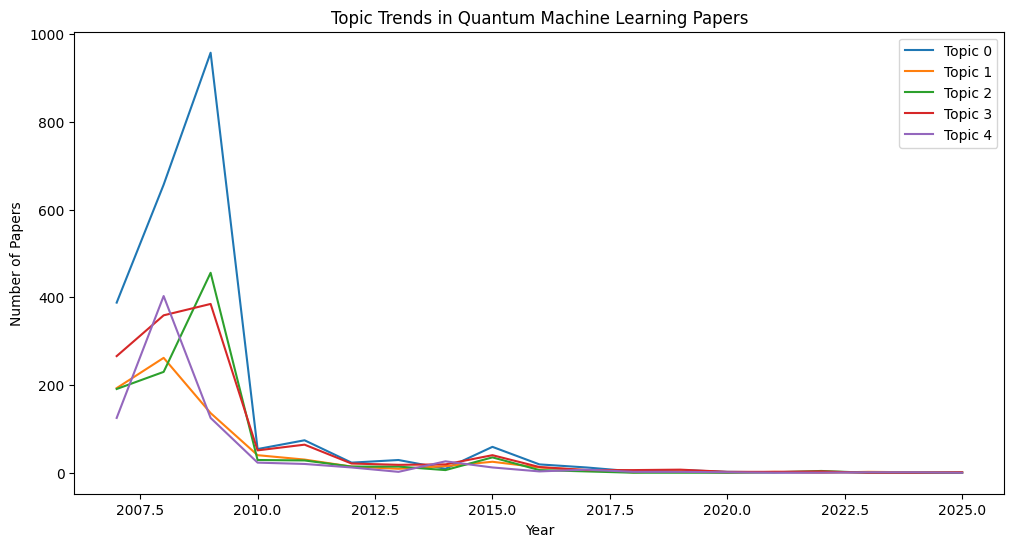

Plot saved as topic_trends.png.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame with topics
print("Loading quantum_papers_with_topics.csv...")
df = pd.read_csv('quantum_papers_with_topics.csv')

# Recreate topic trends
print("Creating topic trends table...")
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)
print("Topic trends by year:")
print(topic_trends)

# Plot trends
print("Creating topic trends plot...")
plt.figure(figsize=(12, 6))
for topic in topic_trends.columns:
    if topic != -1:  # Skip invalid topics
        plt.plot(topic_trends.index, topic_trends[topic], label=f'Topic {topic}')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Topic Trends in Quantum Machine Learning Papers')
plt.legend()
plt.savefig('topic_trends.png')
plt.show()
print("Plot saved as topic_trends.png.")